---

## ⭐ Hope you enjoyed this Notebook!  
### 🙏 Your <span style="color:#e63946; font-weight:bold; text-transform: uppercase;">upvotes</span> & <span style="color:#1d3557; font-weight:bold;">comments</span> mean a lot! 💬❤️

---


# Intel Image Classification: CNN Models with and without Data Augmentation

## Overview
This notebook implements two convolutional neural network (CNN) models to classify images from the Intel Image Classification dataset into six categories: `buildings`, `forest`, `glacier`, `mountain`, `sea`, and `street`. The dataset is sourced from Kaggle and includes training, test, and prediction sets.

### Models
1. **Model 1: Without Data Augmentation**
   - **Description**: A baseline CNN model that manually loads and preprocesses images, resizing them to `(100, 100)`. No data augmentation is applied, making it faster but less robust to overfitting.
   - **Key Features**:
     - Manual image loading using OpenCV (`cv2`).
     - VGG-like architecture with 5 convolutional blocks and dense layers.
     - Input shape: `(100, 100, 3)`.
     - Loss function: `categorical_crossentropy` with one-hot encoded labels.
     - Trained for 10 epochs with early stopping and learning rate reduction.
   - **Use Case**: Quick prototyping and baseline performance evaluation.

2. **Model 2: With Data Augmentation**
   - **Description**: An advanced CNN model using `ImageDataGenerator` for real-time data augmentation, resizing images to `(150, 150)`. Augmentation improves generalization.
   - **Key Features**:
     - Data augmentation: rotation, flip, zoom, shear, brightness adjustment.
     - Same VGG-like architecture but with input shape `(150, 150, 3)`.
     - Loss function: `categorical_crossentropy` (labels are one-hot encoded by generator).
     - Trained for 30 epochs with early stopping and learning rate reduction.
     - Includes prediction visualization for the `seg_pred` dataset.
   - **Use Case**: Robust model for better generalization and production scenarios.

### Dataset
- **Source**: [Intel Image Classification (Kaggle)](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
- **Structure**:
  - `seg_train/seg_train`: ~14,034 images across 6 categories for training.
  - `seg_test/seg_test`: ~3,000 images across 6 categories for testing.
  - `seg_pred/seg_pred`: 7,300 images for prediction (no labels).
- **Preprocessing**:
  - Model 1: Images resized to `(100, 100)` and normalized to `[0, 1]`.
  - Model 2: Images resized to `(150, 150)` with augmentation and rescaling.

### Key Components
- **Model Architecture**: VGG-like CNN with convolutional blocks (64→128→256→512 filters), batch normalization, max pooling, and dense layers.
- **Training**: Uses Adam optimizer, early stopping, and learning rate reduction to prevent overfitting.
- **Evaluation**: Reports test/validation accuracy and loss; plots training history.
- **Prediction**: Model 2 includes a function to visualize predictions on the `seg_pred` dataset.

### Notes
- **Model 1**: Use `sparse_categorical_crossentropy` to simplify label handling (integer labels).
- **Model 2**: Benefits from augmentation but requires more computational resources.
- **Improvements**: Consider transfer learning (e.g., VGG16) or adjusting augmentation parameters for better performance.

This notebook serves as a foundation for image classification tasks, with Model 2 being more suitable for robust applications due to its augmentation.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten ,Dropout,MaxPooling2D,Conv2D,BatchNormalization
from tensorflow.keras.models import Sequential
import os
import glob as gb

2025-05-12 11:19:20.406066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747048760.429802     620 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747048760.436922     620 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for folder in os.listdir("/kaggle/input/intel-image-classification/seg_train/seg_train"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_train/seg_train/" + folder + "/*.jpg")
    print(f"For Training Data , Found {len(files)} images in {folder} folder")

For Training Data , Found 2512 images in mountain folder
For Training Data , Found 2382 images in street folder
For Training Data , Found 2191 images in buildings folder
For Training Data , Found 2274 images in sea folder
For Training Data , Found 2271 images in forest folder
For Training Data , Found 2404 images in glacier folder


In [3]:
for folder in os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_test/seg_test/" + folder + "/*.jpg")
    print(f"For Test Data , Found {len(files)} images in {folder} folder")

For Test Data , Found 525 images in mountain folder
For Test Data , Found 501 images in street folder
For Test Data , Found 437 images in buildings folder
For Test Data , Found 510 images in sea folder
For Test Data , Found 474 images in forest folder
For Test Data , Found 553 images in glacier folder


In [4]:
# files = gb.glob("/kaggle/input/intel-image-classification/seg_pred/seg_pred" + "/*.jpg")
# print(f"For Predication, we have {len(files)} Images")

## Check Image Sizes

In [5]:
size = []
for folder in os.listdir("/kaggle/input/intel-image-classification/seg_train/seg_train/"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_train/seg_train/"+folder+"/*.jpg")
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()    


(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(144, 150, 3)        2
(143, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(100, 150, 3)        1
(141, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(147, 150, 3)        1
(131, 150, 3)        1
(81, 150, 3)         1
(140, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(149, 150, 3)        1
(110, 150, 3)        1
(105, 150, 3)        1
(97, 150, 3)         1
(120, 150, 3)        1
(76, 150, 3)         1
(119, 150, 3)        1
(102, 150, 3)        1
Name: count, dtype: int64

In [6]:
size = []
for folder in os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test/"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_test/seg_test/"+folder+"/*.jpg")
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()    


(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)       1
(141, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(72, 150, 3)        1
Name: count, dtype: int64

In [7]:
# size = []

# # We can see that the images are of different sizes, so we need to resize them to a common size.
# for folder in os.listdir("/kaggle/input/intel-image-classification/seg_pred/seg_pred/"):
#     files = gb.glob("/kaggle/input/intel-image-classification/seg_pred/seg_pred/*.jpg")
#     for file in files:
#         image = plt.imread(file)
#         size.append(image.shape)
        
# pd.Series(size).value_counts()

In [8]:
code = {'buildings': 0 ,'forest':1 ,'glacier':2,'mountain':3 ,'sea':4 ,'street':5}

def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

## Preprocess Training,Test,Pred Data

In [9]:
# Load and resize training images to (100, 100) and assign labels
import cv2

X_train = []
y_train = []
new_size = 100

for folder in os.listdir("/kaggle/input/intel-image-classification/seg_train/seg_train/"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_train/seg_train/"+folder+"/*.jpg")
    for file in files:
        image = cv2.imread(file)
        image_resize = cv2.resize(image,(new_size,new_size))
        X_train.append(image_resize)
        y_train.append(code[folder])


In [10]:
len(y_train),len(X_train)

(14034, 14034)

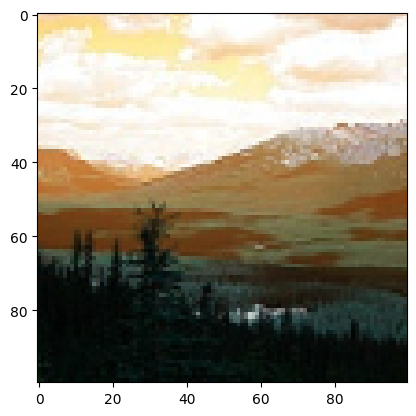

In [11]:
plt.imshow(X_train[1150])

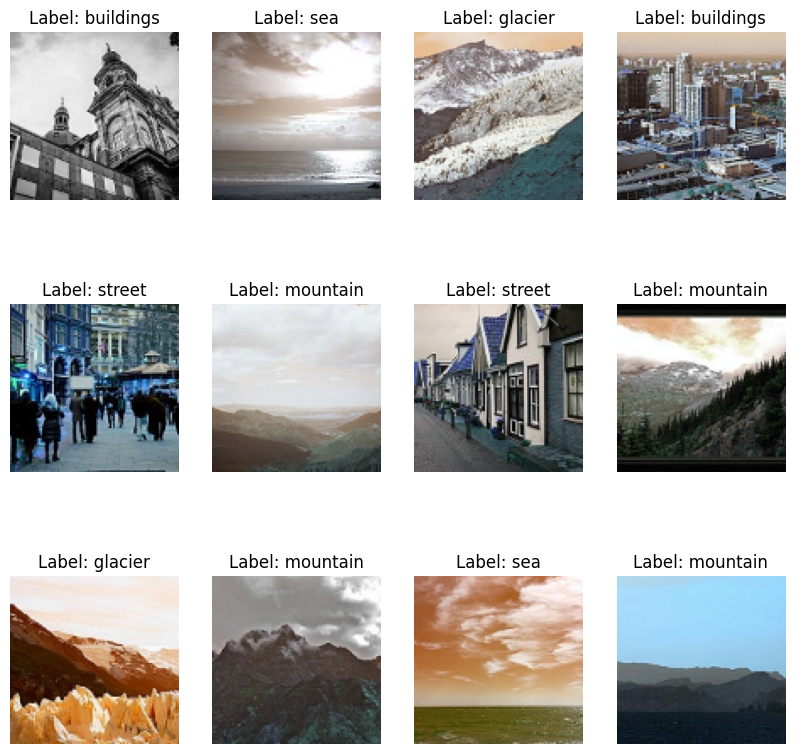

In [12]:
plt.figure(figsize=(10,10))
 
for idx, i in enumerate(np.random.randint(0, len(X_train), 12)):
    plt.subplot(3,4,idx+1)
    plt.imshow(X_train[i],cmap=plt.get_cmap('Greys'))
    plt.axis('off')
    plt.title(f"Label: {getcode(y_train[i])}")
plt.show()

In [13]:
X_test = []
y_test = []

for folder in os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test/"):
    files = gb.glob("/kaggle/input/intel-image-classification/seg_test/seg_test/"+folder+"/*.jpg")
    for file in files:
        image = cv2.imread(file)
        image_resize = cv2.resize(image,(new_size,new_size))
        X_test.append(image_resize)
        y_test.append(code[folder])


In [14]:
len(y_test),len(X_test)

(3000, 3000)

In [15]:
X_val = []

files = gb.glob("/kaggle/input/intel-image-classification/seg_pred/seg_pred/*.jpg")
for file in files:
    image = cv2.imread(file)
    image_resize = cv2.resize(image,(new_size,new_size))
    X_val.append(image_resize)


In [16]:
len(X_val)

7301

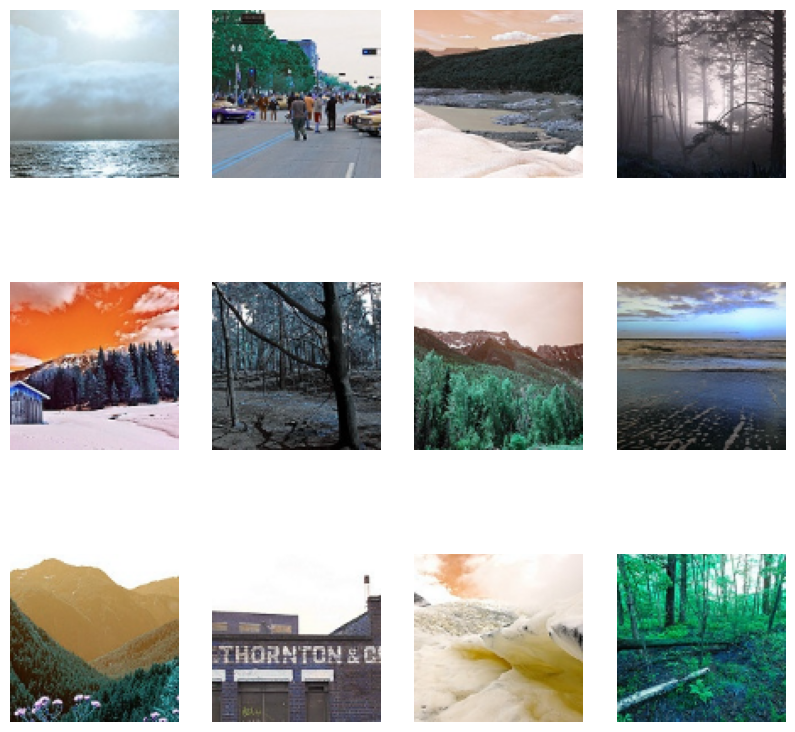

In [17]:
plt.figure(figsize=(10,10))
 
for idx, i in enumerate(np.random.randint(0, len(X_val), 12)):
    plt.subplot(3,4,idx+1)
    plt.imshow(X_val[i],cmap=plt.get_cmap('Greys'))
    plt.axis('off')
plt.show()

In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape

((14034, 100, 100, 3),
 (14034,),
 (3000, 100, 100, 3),
 (3000,),
 (7301, 100, 100, 3))

In [19]:
# Normalize the data
# X_train ,X_test  = X_train / 255.0, X_test / 255.0

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Define CNN Model for Model 1

In [20]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [39]:
model = Sequential([

        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(X_train.shape[1:])),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Classification part
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.2),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(6, activation='softmax')
    ])

In [44]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,1

 Total params: 37,811,526 (144.24 MB)

 Trainable params: 37,803,078 (144.21 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [46]:
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test), batch_size=32,verbose=1)

Epoch 1/20


I0000 00:00:1747049859.531423     686 service.cc:148] XLA service 0x7fb44c003220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747049859.531501     686 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747049860.603594     686 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/439 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.1641 - loss: 12.9998  

I0000 00:00:1747049869.993210     686 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.3950 - loss: 3.6567 - val_accuracy: 0.1893 - val_loss: 2.4746
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.6612 - loss: 0.9344 - val_accuracy: 0.4647 - val_loss: 1.6243
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.7458 - loss: 0.7350 - val_accuracy: 0.5010 - val_loss: 2.3397
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.7652 - loss: 0.7000 - val_accuracy: 0.5223 - val_loss: 1.3243
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 81ms/step - accuracy: 0.7813 - loss: 0.6549 - val_accuracy: 0.6253 - val_loss: 1.7433
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.8030 - loss: 0.5839 - val_accuracy: 0.5403 - val_loss: 1.5251
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.8111 - loss: 0.5902 - val_accuracy: 0.5873 - val_loss: 1.1592
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.8207 - loss: 0.5510 - val_accura

In [47]:
Loss , Acc = model.evaluate(X_test,y_test)
print("Accuracy: ", Acc)
print("Loss: ", Loss)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8585 - loss: 0.4177
Accuracy:  0.8496666550636292
Loss:  0.4377334713935852


In [48]:
loss , acc = model.evaluate(X_train ,y_train)
print("Accuracy: ", acc)
print("Loss: ", loss)


439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8987 - loss: 0.3253
Accuracy:  0.8811457753181458
Loss:  0.3459951877593994


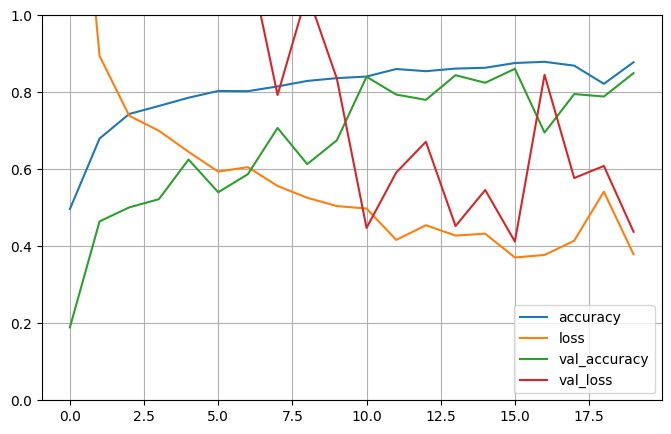

In [49]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:20], y_test[:20]


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))

## Model 2: With Data Augmentation

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import tensorflow_datasets as tfds
import numpy as np

tf.random.set_seed(42)

def load_intel_dataset():

    train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
    val_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'
    pred_dir = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'

    # Enhanced Data Augmentation for training
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,          # Increased rotation range
        width_shift_range=0.3,      # Increased width shift
        height_shift_range=0.3,     # Increased height shift
        horizontal_flip=True,
        zoom_range=0.3,             # Increased zoom range
        shear_range=0.2,            # Added shear
        brightness_range=[0.8, 1.2],# Added brightness adjustment
        fill_mode='nearest'
    )

    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    pred_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Load training and validation data
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    # Load prediction data (seg_pred)
    pred_generator = pred_datagen.flow_from_directory(
        pred_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode=None,  # No labels for seg_pred
        shuffle=False
    )

    return train_generator, val_generator, pred_generator

In [53]:
# Function to predict and display images with labels

def predict_and_display(pred_generator, model, num_images=5):
    
    class_labels = {v: k for k, v in pred_generator.class_indices.items()}

    pred_generator.reset()
    image_paths = pred_generator.filepaths[:num_images]
    images = []
    for i in range(num_images):
        img = load_img(image_paths[i], target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    images = np.array(images)

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        predicted_class = class_labels[predicted_labels[i]]
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
    plt.close()

In [54]:
train_generator, val_generator, pred_generator = load_intel_dataset()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [55]:
model = Sequential([

        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(512, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Classification part
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.2),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(6, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

In [57]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)                   │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 150, 150, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 150, 150, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 75, 75, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 75, 75, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 37, 37, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 37, 37, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 37, 37, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,1

 Total params: 52,491,590 (200.24 MB)

 Trainable params: 52,483,142 (200.21 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [ ]:
with tf.device("/GPU:0"):
    history = model.fit(
            train_generator,
            epochs=10,
            validation_data=val_generator,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
                tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=3)]
        )

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 229ms/step - accuracy: 0.6634 - loss: 0.9334 - val_accuracy: 0.5387 - val_loss: 1.7195 - learning_rate: 0.0010
Epoch 2/10
245/439 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.6788 - loss: 0.9214

In [ ]:
predict_and_display(pred_generator, model, num_images=5)

In [ ]:
Loss , Acc = model.evaluate(val_generator)
print("Accuracy: ", Acc)
print("Loss: ", Loss)

In [ ]:
loss , acc = model.evaluate(train_generator)
print("Accuracy: ", acc)
print("Loss: ", loss)

In [ ]:
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()